# 다변수 가우시안 정규 분포

* 지금까지는 이산분포. 이제는 연속확률변수의 경우
* 벡터의 이차 형식(quadratic form) 하면 스칼라가 된다. 
* 가우시안 노말분포에서는 당연히 포지티브데피닛을 넣어야 한다. 그래서 행렬 I를 넣어야 한다?
* 시그마함수는 무조건 대칭이 되어야 한다.

다변수 가우시안 정규 분포 혹은 간단히 다변수 정규 분포(MVN: Multivariate Normal)는 복수의 확률 변수를 모형화하는데 가장 많이 사용되는 분포이다. 

$D$차원 다변수 정규 분포의 확률 밀도 함수는 다음과 같다.

$$ \mathcal{N}(x \mid \mu, \Sigma) = \dfrac{1}{(2\pi)^{D/2} |\Sigma|^{1/2}} \exp \left( -\dfrac{1}{2} (x-\mu)^T \Sigma^{-1} (x-\mu) \right) $$

이 식에서 각 기호는 다음을 의미한다.

* $x \in \mathbf{R}^D $ 확률 변수 벡터
* $\mu \in \mathbf{R}^D $ 평균 벡터
* $\Sigma \in \mathbf{R}^{D\times D} $ 공분산 벡터
* $\Sigma^{-1} \in \mathbf{R}^{D\times D} $ 공분산 벡터의 역행렬

공분산 벡터의 역행렬 $\Sigma^{-1}$는 precision matrix 혹은 concentration matrix 라고도 한다.

## SciPy의 다변수 정규 분포 지원

SciPy의 stats 서브패키지에는 다변수 정규 분포를 위한 `multivariate_normal` 클래스가 있다. `mean` 인수로 평균 벡터를, `cov` 인수로 공분산 행렬을 받는다.

## 다변수 정규 분포의 예

2차원($D=2$) 다변수 정규 분포의 예를 몇가지 살펴보자. 

우선 2차원이므로 확률 변수 벡터는 
$$ 
x = \begin{bmatrix}x_1 \\ x_2 \end{bmatrix}
$$
이다.

### 경우 1


만약

$$ 
\mu = \begin{bmatrix}2 \\ 3 \end{bmatrix}. \;\;\;
\Sigma = \begin{bmatrix}1 & 0 \\ 0 & 1 \end{bmatrix} 
$$

이면 

$$ 
|\Sigma|^{1/2} = 1. \;\;\;
\Sigma^{-1} = \begin{bmatrix}1 & 0 \\ 0 & 1 \end{bmatrix}
$$

$$ 
(x-\mu)^T \Sigma^{-1} (x-\mu) =  
\begin{bmatrix}x_1 - 2 & x_2 - 3 \end{bmatrix}
\begin{bmatrix}1 & 0 \\ 0 & 1 \end{bmatrix} 
\begin{bmatrix}x_1 - 2 \\ x_2 - 3 \end{bmatrix}
=
(x_1 - 2)^2 + (x_2 - 3)^2
$$

$$
\mathcal{N}(x_1, x_2) = \dfrac{1}{\sqrt{2\pi}}
\exp \left( -\dfrac{1}{2} \left( (x_1 - 2)^2 + (x_2 - 3)^2 \right) \right)
$$

이 확률 밀도 함수의 모양은 다음과 같다.

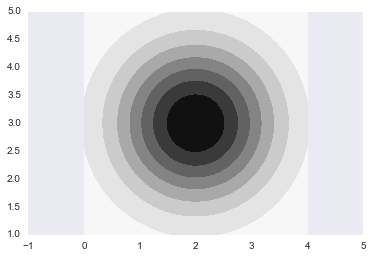

In [16]:
mu = [2, 3]
cov = [[1, 0], [0, 1]]
rv = sp.stats.multivariate_normal(mu, cov)
xx = np.linspace(0, 4, 120)
yy = np.linspace(1, 5, 150)
XX, YY = np.meshgrid(xx, yy)
plt.grid(False)
plt.contourf(XX, YY, rv.pdf(np.dstack([XX, YY])))
plt.axis("equal")
plt.show()

### 경우 2


만약

$$ 
\mu = \begin{bmatrix}2 \\ 3 \end{bmatrix}. \;\;\;
\Sigma = \begin{bmatrix}2 & 3 \\ 3 & 7 \end{bmatrix} 
$$

이면 
$$ 
|  \Sigma | = 5,\;\;\;
\Sigma^{-1} = \begin{bmatrix}1.4 & -0.6 \\ -0.6 & 0.4 \end{bmatrix}
$$

$$ 
(x-\mu)^T \Sigma^{-1} (x-\mu) =  
\begin{bmatrix}x_1 - 2 & x_2 - 3 \end{bmatrix}
\begin{bmatrix}1.4 & -0.6 \\ -0.6 & 0.4\end{bmatrix}
\begin{bmatrix}x_1 - 2 \\ x_2 - 3 \end{bmatrix}
=
\dfrac{1}{10}\left(14(x_1 - 2)^2 - 12(x_1 - 2)(x_2 - 3) + 4(x_2 - 3)^2\right)
$$

$$
\mathcal{N}(x_1, x_2) = \dfrac{1}{\sqrt{20\pi}}
\exp \left( -\dfrac{1}{10}\left(7(x_1 - 2)^2 - 6(x_1 - 2)(x_2 - 3) + 2(x_2 - 3)^2\right) \right)
$$

이 확률 밀도 함수의 모양은 다음과 같다.

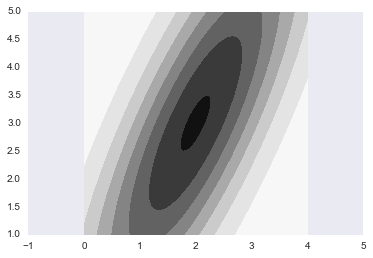

In [2]:
mu = [2, 3]
cov = [[2, 3], [3, 7]]
rv = sp.stats.multivariate_normal(mu, cov)
xx = np.linspace(0, 4, 120)
yy = np.linspace(1, 5, 150)
XX, YY = np.meshgrid(xx, yy)
plt.grid(False)
plt.contourf(XX, YY, rv.pdf(np.dstack([XX, YY])))
plt.axis("equal")
plt.show()

## 다변수 정규 분포의 최적화

* mu만 변수. 시그마는 상수. mu 값을 찾는 문제
* 크기는 찌그러들지만 높이는 변하지 않기 때문에 로그를 취한 함수를 최적화 하는 것이 일반적이다.
* 독립적인 것은 그냥 2개의 pdf를 곱하면 된다.

다변수 정규 분포를 모수에 대해 최적화하는 문제를 풀어보자. 어떤 함수에 로그를 취해도 최고점이나 최저점의 위치는 변하지 않기 때문에 문제를 쉽게 하기 위해 로그를 취한 분포함수를 최적화를 한다. 

$$ \log \mathcal{N}(x|\mu, \Sigma) = -\dfrac{1}{2} \log|\Sigma| - \dfrac{1}{2} (x-\mu)^T \Sigma^{-1} (x-\mu)  $$


기호를 단순하게 하기 위해 precision matrix $\Sigma ^{-1} $를 $ \Lambda$ 로 표시한다.

$$ \dfrac{1}{2} f = \log \mathcal{N}(x|\mu, \Sigma) = \dfrac{1}{2} \log|\Lambda| - \dfrac{1}{2} (x-\mu)^T \Lambda (x-\mu)  $$

스칼라 함수 $f$ 를 평균 벡터 $\mu$로 미분하면 다음과 같다.

$$
\begin{eqnarray}
\dfrac{\partial f}{\partial \mu} 
&=& \dfrac{\partial}{\partial \mu} \big( \log | \Lambda | \big) - \dfrac{\partial}{\partial \mu} \big( (x-\mu)^T \Lambda (x-\mu) \big) \\
&=& (\Lambda + \Lambda^T)(x-\mu) \\
&=& 0
\end{eqnarray}
$$

$$
\therefore  \;\; \mu = x
$$

이번에는 두 개의 다변수 정규 분포 확률 변수 $X$, $Y$가 있을 경우를 생각해 보자. 두 확률 변수가 독립이며 모수 $\mu$, $\Lambda$가 같다고 가정하자.

이 때 로그 정규 분포는 다음과 같다.


$$ 
\begin{eqnarray}
\dfrac{1}{2}f
&=& \log \left( \mathcal{N}(x|\mu, \Sigma)\mathcal{N}(y|\mu, \Sigma)\right)  \\
&=& \log \mathcal{N}(x|\mu, \Sigma) + \log \mathcal{N}(y|\mu, \Sigma) \\
&=& - \log|\Sigma| - \dfrac{1}{2} (x-\mu)^T \Lambda (x-\mu) - \dfrac{1}{2} (y-\mu)^T \Lambda  (y-\mu)  
\end{eqnarray}
$$

이 함수 $f$를 평균 벡터 $\mu$와 precision matrix $\Lambda$ 로 미분하면 다음과 같다.

$$
\begin{eqnarray}
\dfrac{\partial f}{\partial \mu} 
&=& \dfrac{\partial}{\partial \mu} \big( 2\log | \Lambda | \big) 
- \dfrac{\partial}{\partial \mu} \big( (x-\mu)^T \Lambda (x-\mu) \big) 
- \dfrac{\partial}{\partial \mu} \big( (y-\mu)^T \Lambda (y-\mu) \big) \\
&=& (\Lambda + \Lambda^T)(x-\mu) + (\Lambda + \Lambda^T)(y-\mu) \\
&=& 0
\end{eqnarray}
$$

$$
\therefore  \;\; \mu = \dfrac{x + y}{2}
$$


$$
\begin{eqnarray}
\dfrac{\partial f}{\partial \Lambda} 
&=& \dfrac{\partial}{\partial \Lambda} \big( 2\log | \Lambda | \big) 
- \dfrac{\partial}{\partial \Lambda} \big( (x-\mu)^T \Lambda (x-\mu) \big) 
- \dfrac{\partial}{\partial \Lambda} \big( (y-\mu)^T \Lambda (y-\mu) \big) \\
&=& (2\Lambda^{-1})^T 
- \dfrac{\partial}{\partial \Lambda} \left( \text{tr} \left( (x-\mu)(x-\mu)^T \Lambda \right) \right) 
- \dfrac{\partial}{\partial \Lambda} \left( \text{tr} \left( (y-\mu)(y-\mu)^T \Lambda \right) \right) \\
&=& 2\Sigma^T - ((x-\mu)(x-\mu)^T)^T  - ((y-\mu)(y-\mu)^T)^T \\
&=& 0
\end{eqnarray}
$$

$$
\therefore  \;\; \Sigma = \dfrac{1}{2} \left( (x-\mu)(x-\mu)^T + (y-\mu)(y-\mu)^T \right)
$$